In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import plotly.express as px

In [152]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/COVID-19%20Coronavirus%20(2).csv"
df = pd.read_csv(url)
df.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [153]:
# Describe data
df.describe()

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,225.000000,225.000000,225.000000
mean,3.507321e+07,2.184781e+06,2.744813e+04,136900.373333,1096.715556,1.444125
std,1.392418e+08,7.275938e+06,9.689177e+04,145060.340289,1195.715543,1.741728
min,8.050000e+02,1.000000e+00,0.000000e+00,9.000000,0.000000,0.000000
25%,5.665570e+05,2.407100e+04,1.890000e+02,11384.000000,123.000000,0.511291
50%,5.827911e+06,1.639360e+05,1.965000e+03,88987.000000,708.000000,1.036905
75%,2.190585e+07,1.092547e+06,1.366000e+04,223335.000000,1795.000000,1.977017
max,1.439324e+09,8.183905e+07,1.008222e+06,696044.000000,6286.000000,18.151787


In [154]:
# Check for info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   Other names              224 non-null    object 
 2   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 3   Population               225 non-null    int64  
 4   Continent                225 non-null    object 
 5   Total Cases              225 non-null    int64  
 6   Total Deaths             225 non-null    int64  
 7   Tot Cases//1M pop        225 non-null    int64  
 8   Tot Deaths/1M pop        225 non-null    int64  
 9   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


In [155]:
# Check missing value
df.isnull().sum()

,0
Country,0
Other names,1
ISO 3166-1 alpha-3 CODE,0
Population,0
Continent,0
Total Cases,0
Total Deaths,0
Tot Cases//1M pop,0
Tot Deaths/1M pop,0
Death percentage,0


In [156]:
df['Other names'] = df['Other names'].fillna(df['Country'])

# Recheck for missing values after filling
df.isnull().sum()

,0
Country,0
Other names,0
ISO 3166-1 alpha-3 CODE,0
Population,0
Continent,0
Total Cases,0
Total Deaths,0
Tot Cases//1M pop,0
Tot Deaths/1M pop,0
Death percentage,0


In [157]:
print(df.columns.tolist())

['Country', 'Other names', 'ISO 3166-1 alpha-3 CODE', 'Population', 'Continent', 'Total Cases', 'Total Deaths', 'Tot\xa0Cases//1M pop', 'Tot\xa0Deaths/1M pop', 'Death percentage']


In [158]:
# Rename problematic columns for consistency
df = df.rename(columns={
    'Tot\xa0Cases//1M pop': 'Total_Cases_per_1M_Pop',
    'Tot\xa0Deaths/1M pop': 'Total_Deaths_per_1M_Pop'
})

# Display the new column names to confirm
print(df.columns.tolist())

# Display the first few rows of the DataFrame with updated column names
df.head()

['Country', 'Other names', 'ISO 3166-1 alpha-3 CODE', 'Population', 'Continent', 'Total Cases', 'Total Deaths', 'Total_Cases_per_1M_Pop', 'Total_Deaths_per_1M_Pop', 'Death percentage']


,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Total_Cases_per_1M_Pop,Total_Deaths_per_1M_Pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


# Exploratory Data Analysis

In [159]:
continent_cases = df.groupby('Continent')['Total Cases'].sum().reset_index()

fig = px.bar(continent_cases, x='Continent', y='Total Cases', title='Total COVID-19 Cases by Continent', color='Continent')
fig.show()

This bar chart shows the total confirmed COVID-19 cases in each continent. It is evident that Europe and Asia have the highest number of cases, highlighting the significant impact of the pandemic in these regions. This provides a general overview of the global distribution of total cases.

In [160]:
import plotly.express as px
fig = px.choropleth(
    df,
    locations="ISO 3166-1 alpha-3 CODE",
    color="Continent",
    hover_name="Country",
    projection="natural earth",
    title="World Map of Countries by Continent"
)
fig.show()

This choropleth map visualizes the total COVID-19 cases per one million population in each country. Darker colors indicate a higher incidence of cases relative to the population, helping to identify countries most severely affected proportionally. This visualization highlights how case density varies across the world, not only based on the absolute number of cases but also on how widely it is spread among the population

In [161]:
# One Hot Encoding for Continent column
df_encoded = pd.get_dummies(df, columns=['Continent'], drop_first=True)

# Identify numerical columns for scaling
numerical_cols = ['Population', 'Total Cases', 'Total Deaths', 'Total_Cases_per_1M_Pop', 'Total_Deaths_per_1M_Pop', 'Death percentage']

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaling to numerical columns
df_scaled_numerical = scaler.fit_transform(df_encoded[numerical_cols])
df_scaled_numerical = pd.DataFrame(df_scaled_numerical, columns=numerical_cols, index=df_encoded.index)

# Drop original numerical columns and concatenate scaled ones
df_processed = df_encoded.drop(columns=numerical_cols).copy()
for col in numerical_cols:
    df_processed[col] = df_scaled_numerical[col]

# Display the first few rows of the processed DataFrame
df_processed.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Continent_Asia,Continent_Europe,Continent_Latin America and the Caribbean,Continent_Northern America,Continent_Oceania,Population,Total Cases,Total Deaths,Total_Cases_per_1M_Pop,Total_Deaths_per_1M_Pop,Death percentage
0,Afghanistan,Afghanistan,AFG,True,False,False,False,False,0.038789,-0.276449,-0.204571,-0.915487,-0.759994,1.651243
1,Albania,Albania,ALB,False,True,False,False,False,-0.231774,-0.263220,-0.247798,-0.287081,0.099982,-0.097285
2,Algeria,Algeria,DZA,False,False,False,False,False,0.073154,-0.264347,-0.212815,-0.905275,-0.791845,0.657760
3,Andorra,Andorra,AND,False,True,False,False,False,-0.251891,-0.295431,-0.282336,2.623123,0.736164,-0.611015
4,Angola,Angola,AGO,False,False,False,False,False,-0.003016,-0.287281,-0.264265,-0.926078,-0.873149,0.271204


In [162]:
# get stastical information on the new dataset
df_processed.describe()

,Population,Total Cases,Total Deaths,Total_Cases_per_1M_Pop,Total_Deaths_per_1M_Pop,Death percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,2.250000e+02,2.250000e+02,2.250000e+02
mean,-1.578984e-17,2.713879e-17,8.881784e-18,7.894919e-17,4.736952e-17,2.131628e-16
std,1.002230e+00,1.002230e+00,1.002230e+00,1.002230e+00,1.002230e+00,1.002230e+00
min,-2.524428e-01,-3.009443e-01,-2.839181e-01,-9.457898e-01,-9.192494e-01,-8.309821e-01
25%,-2.483707e-01,-2.976287e-01,-2.819631e-01,-8.671993e-01,-8.161528e-01,-5.367737e-01
50%,-2.105007e-01,-2.783629e-01,-2.635925e-01,-3.310361e-01,-3.258152e-01,-2.343236e-01
75%,-9.477552e-02,-1.504507e-01,-1.426217e-01,5.971815e-01,5.852909e-01,3.066382e-01
max,1.010746e+01,1.097204e+01,1.014493e+01,3.863153e+00,4.349575e+00,9.613966e+00


## KMeans Clustering

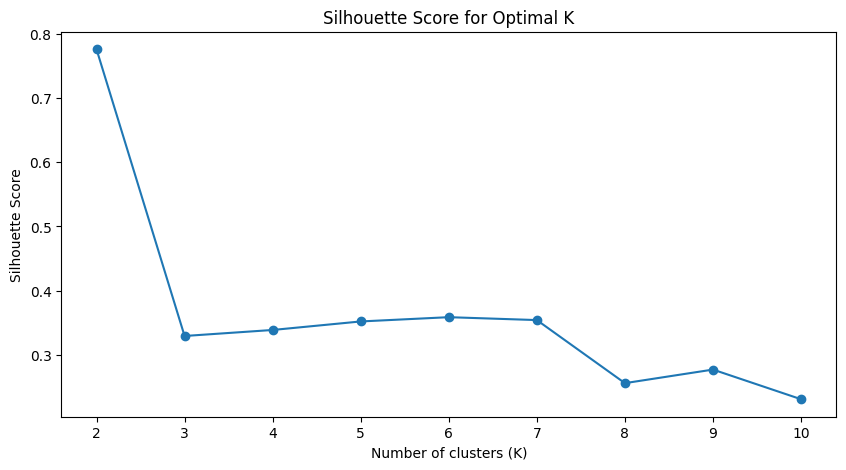

In [163]:
X = df_processed.drop(columns=['Country', 'Other names', 'ISO 3166-1 alpha-3 CODE'])

inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Set n_init to suppress warning
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plotting the Silhouette Score
plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

In [164]:
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_processed['KMeans_Cluster'] = kmeans.fit_predict(X)
df_processed.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Continent_Asia,Continent_Europe,Continent_Latin America and the Caribbean,Continent_Northern America,Continent_Oceania,Population,Total Cases,Total Deaths,Total_Cases_per_1M_Pop,Total_Deaths_per_1M_Pop,Death percentage,KMeans_Cluster
0,Afghanistan,Afghanistan,AFG,True,False,False,False,False,0.038789,-0.276449,-0.204571,-0.915487,-0.759994,1.651243,0
1,Albania,Albania,ALB,False,True,False,False,False,-0.231774,-0.263220,-0.247798,-0.287081,0.099982,-0.097285,0
2,Algeria,Algeria,DZA,False,False,False,False,False,0.073154,-0.264347,-0.212815,-0.905275,-0.791845,0.657760,0
3,Andorra,Andorra,AND,False,True,False,False,False,-0.251891,-0.295431,-0.282336,2.623123,0.736164,-0.611015,0
4,Angola,Angola,AGO,False,False,False,False,False,-0.003016,-0.287281,-0.264265,-0.926078,-0.873149,0.271204,0


## Hierarchical Agglomerative Clustering

Skipping Ward linkage with Manhattan metric (not supported).


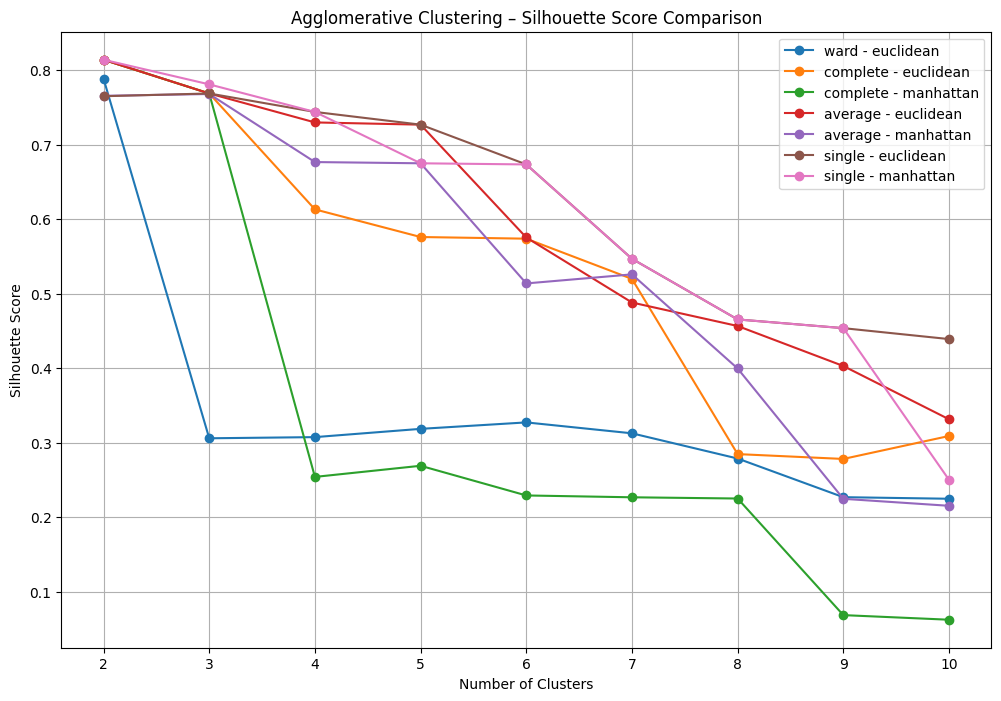


✅ Best Silhouette Score: 0.814
Optimal Number of Clusters: 2
Optimal Linkage Method: complete
Optimal Metric: euclidean


In [165]:
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''
results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(X)
            silhouette_avg = silhouette_score(X, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric

        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Agglomerative Clustering – Silhouette Score Comparison")
plt.legend()
plt.grid(True)
plt.show()

print(f"\n✅ Best Silhouette Score: {best_silhouette_score:.3f}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

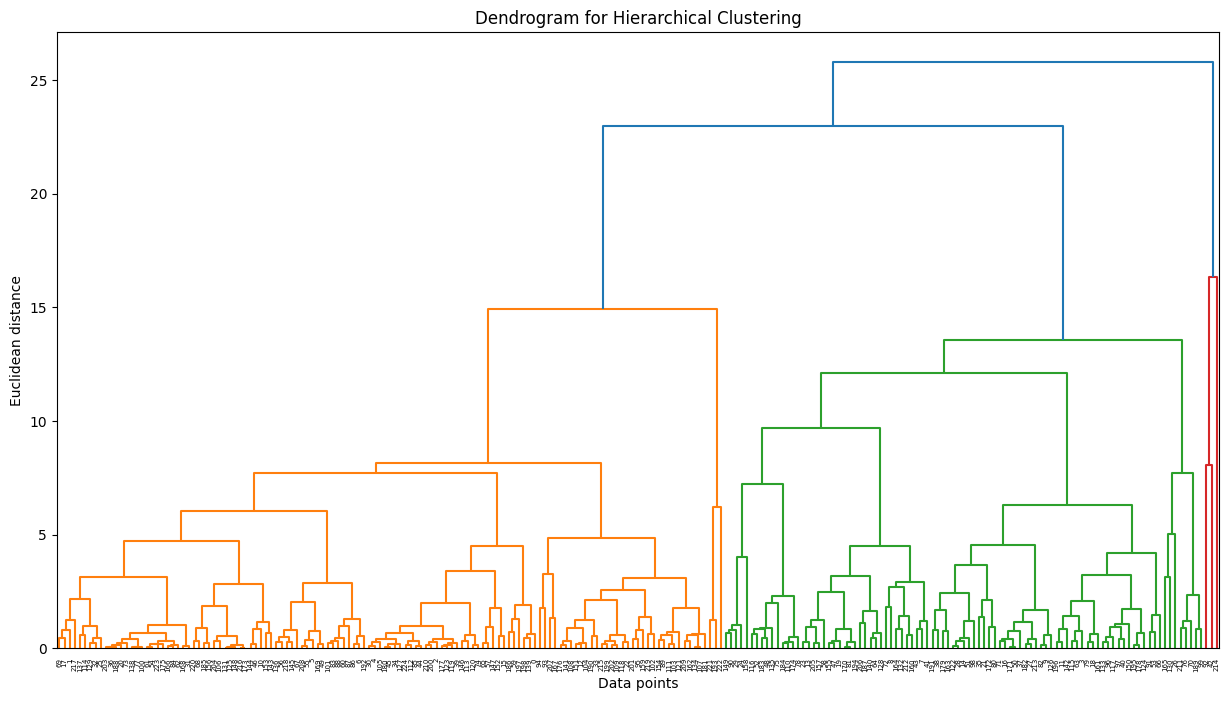

In [166]:
# Dendogram for Hierarchical Clustering
linked = linkage(X, method='ward')
plt.figure(figsize=(15, 8))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data points')
plt.ylabel('Euclidean distance')
plt.show()

In [167]:
# Apply Hierarchical Agglomerative Clustering to the `df_processed` DataFrame using the optimal number of clusters (K) determined previously. Assign the resulting cluster labels back to the DataFrame.
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
df_processed['Hierarchical_Cluster'] = agg_clustering.fit_predict(X)
df_processed.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Continent_Asia,Continent_Europe,Continent_Latin America and the Caribbean,Continent_Northern America,Continent_Oceania,Population,Total Cases,Total Deaths,Total_Cases_per_1M_Pop,Total_Deaths_per_1M_Pop,Death percentage,KMeans_Cluster,Hierarchical_Cluster
0,Afghanistan,Afghanistan,AFG,True,False,False,False,False,0.038789,-0.276449,-0.204571,-0.915487,-0.759994,1.651243,0,0
1,Albania,Albania,ALB,False,True,False,False,False,-0.231774,-0.263220,-0.247798,-0.287081,0.099982,-0.097285,0,0
2,Algeria,Algeria,DZA,False,False,False,False,False,0.073154,-0.264347,-0.212815,-0.905275,-0.791845,0.657760,0,0
3,Andorra,Andorra,AND,False,True,False,False,False,-0.251891,-0.295431,-0.282336,2.623123,0.736164,-0.611015,0,0
4,Angola,Angola,AGO,False,False,False,False,False,-0.003016,-0.287281,-0.264265,-0.926078,-0.873149,0.271204,0,0


# Evaluate both models using silhoutte score

In [168]:
# KMeans Silhouette Score for optimal_k=2
kmeans_silhouette = silhouette_scores[optimal_k - 2] # Adjust index because k_range starts from 2
print(f"KMeans Silhouette Score (optimal K={optimal_k}): {kmeans_silhouette:.3f}")

# Hierarchical Clustering Silhouette Score for optimal_k=2
hierarchical_silhouette = silhouette_score(X, df_processed['Hierarchical_Cluster'])
print(f"Hierarchical Agglomerative Clustering Silhouette Score (optimal K={optimal_k}): {hierarchical_silhouette:.3f}")

KMeans Silhouette Score (optimal K=2): 0.776
Hierarchical Agglomerative Clustering Silhouette Score (optimal K=2): 0.788


In [169]:
# KMeans
df_original_numerical = df[numerical_cols].copy()
df_original_numerical['KMeans_Cluster'] = df_processed['KMeans_Cluster']

kmeans_cluster_means = df_original_numerical.groupby('KMeans_Cluster').mean()
print('KMeans Cluster Means (Original Scale):')
print(kmeans_cluster_means)

KMeans Cluster Means (Original Scale):
                  Population   Total Cases   Total Deaths  \
KMeans_Cluster                                              
0               2.674825e+07  1.516702e+06   17954.729730   
1               6.511198e+08  5.162264e+07  729959.666667   

                Total_Cases_per_1M_Pop  Total_Deaths_per_1M_Pop  \
KMeans_Cluster                                                    
0                        136881.963964              1082.463964   
1                        138262.666667              2151.333333   

                Death percentage  
KMeans_Cluster                    
0                       1.442719  
1                       1.548193  


In [170]:
# Hierarchical
df_original_numerical['Hierarchical_Cluster'] = df_processed['Hierarchical_Cluster']

hierarchical_cluster_means = df_original_numerical.groupby('Hierarchical_Cluster').mean()
print('Hierarchical Cluster Means (Original Scale):')
print(hierarchical_cluster_means)

Hierarchical Cluster Means (Original Scale):
                        Population   Total Cases   Total Deaths  \
Hierarchical_Cluster                                              
0                     2.123420e+07  1.651140e+06   20908.022523   
1                     1.059160e+09  4.167428e+07  511416.000000   

                      Total_Cases_per_1M_Pop  Total_Deaths_per_1M_Pop  \
Hierarchical_Cluster                                                    
0                              137509.409910              1096.270270   
1                               91831.666667              1129.666667   

                      Death percentage  KMeans_Cluster  
Hierarchical_Cluster                                    
0                             1.439131        0.004505  
1                             1.813664        0.666667  


In [171]:
# Data summary for 'K-Means Cluster'
cluster_summary = df.groupby(df_processed['KMeans_Cluster']).agg({
    'Population': ['mean', 'median'],
    'Continent': [('most_frequent', lambda x: x.mode()[0]), 'count'],
    'Total Cases': ['mean', 'median'],
    'Total Deaths': ['mean', 'median'],
    'Total_Cases_per_1M_Pop': ['mean', 'median'],
    'Total_Deaths_per_1M_Pop': ['mean', 'median'],
    'Death percentage': ['mean', 'median']
})

# Rename the <lambda> column in the Gender MultiIndex level
cluster_summary = cluster_summary.rename(columns={'<lambda>': 'most_frequent'}, level=1)

cluster_summary = cluster_summary.rename_axis('cluster')

cluster_summary

Population                  Continent         Total Cases  \
                 mean       median most_frequent count          mean   
cluster                                                                
0        2.674825e+07    5655738.5        Africa   222  1.516702e+06   
1        6.511198e+08  334400597.0          Asia     3  5.162264e+07   

                      Total Deaths           Total_Cases_per_1M_Pop            \
             median           mean    median                   mean    median   
cluster                                                                         
0          161270.5   17954.729730    1913.5          136881.963964   88662.0   
1        43029044.0  729959.666667  660269.0          138262.666667  139401.0   

        Total_Deaths_per_1M_Pop         Death percentage            
                           mean  median             mean    median  
cluster                                                             
0                   1082.463964   683.0         1.442719  1.017389  
1                   2151.333333  3015.0         1.548193  1.231957

In [172]:
# Create a temporary DataFrame for summarizing that contains all necessary columns
df_with_clusters = df.copy()
df_with_clusters['KMeans_Cluster'] = df_processed['KMeans_Cluster']
df_with_clusters['Hierarchical_Cluster'] = df_processed['Hierarchical_Cluster']

# Data summary for 'Hierarchical Cluster'
cluster_summary = df_with_clusters.groupby('Hierarchical_Cluster').agg({
    'Population': ['mean', 'median'],
    'Continent': [('most_frequent', lambda x: x.mode()[0]), 'count'],
    'Total Cases': ['mean', 'median'],
    'Total Deaths': ['mean', 'median'],
    'Total_Cases_per_1M_Pop': ['mean', 'median'],
    'Total_Deaths_per_1M_Pop': ['mean', 'median'],
    'Death percentage': ['mean', 'median'],
    'KMeans_Cluster': [('most_frequent', lambda x: x.mode()[0]), 'count']
})

# Rename the <lambda> column in the Gender MultiIndex level
cluster_summary = cluster_summary.rename(columns={'<lambda>': 'most_frequent'}, level=1)

cluster_summary = cluster_summary.rename_axis('cluster')

cluster_summary

Population                   Continent         Total Cases  \
                 mean        median most_frequent count          mean   
cluster                                                                 
0        2.123420e+07  5.655738e+06        Africa   222  1.651140e+06   
1        1.059160e+09  1.403754e+09          Asia     3  4.167428e+07   

                      Total Deaths           Total_Cases_per_1M_Pop           \
             median           mean    median                   mean   median   
cluster                                                                        
0          162753.0   20908.022523    1913.5          137509.409910  90149.5   
1        43029044.0  511416.000000  521388.0           91831.666667  30653.0   

        Total_Deaths_per_1M_Pop        Death percentage            \
                           mean median             mean    median   
cluster                                                             
0                   1096.270270  710.5         1.439131  1.017389   
1                   1129.666667  371.0         1.813664  1.231957   

        KMeans_Cluster        
         most_frequent count  
cluster                       
0                    0   222  
1                    1     3

Both KMeans and Hierarchical Agglomerative Clustering (with K=2) identify two primary clusters that largely correspond to each other. One cluster represents the majority of countries with a relatively lower COVID-19 impact, characterized by lower absolute cases, deaths, and population. The other smaller cluster comprises countries with a much higher absolute impact. The main difference appears to be in the Total_Cases_per_1M_Pop for the smaller, higher-impact cluster. In KMeans, this metric is slightly higher, whereas in Hierarchical clustering, it is lower for the higher-impact cluster. This subtle difference could indicate varying sensitivities to per-capita metrics between the two algorithms or different groupings of specific data points. Overall, both methods successfully segmented the countries based on their COVID-19 statistics and demographic features, with the smaller cluster consistently identifying countries with a higher absolute burden.

# Cluster Visualization




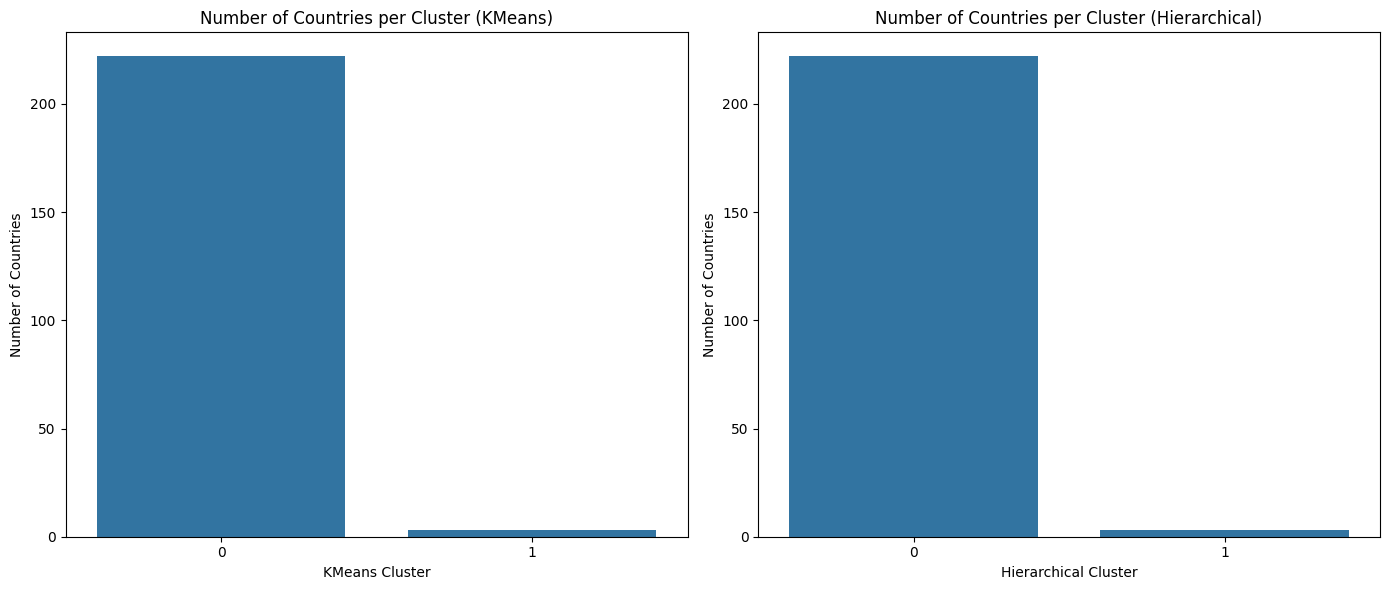

In [173]:
plt.figure(figsize=(14,6))

# --- Plot 1: KMeans ---
plt.subplot(1, 2, 1)
sns.countplot(data=df_processed, x="KMeans_Cluster")
plt.title("Number of Countries per Cluster (KMeans)")
plt.xlabel("KMeans Cluster")
plt.ylabel("Number of Countries")

# --- Plot 2: Hierarchical ---
plt.subplot(1, 2, 2)
sns.countplot(data=df_processed, x="Hierarchical_Cluster")
plt.title("Number of Countries per Cluster (Hierarchical)")
plt.xlabel("Hierarchical Cluster")
plt.ylabel("Number of Countries")

plt.tight_layout()
plt.show()


In [174]:
fig = px.choropleth(
    df_processed,
    locations="ISO 3166-1 alpha-3 CODE",
    color="KMeans_Cluster",
    hover_name="Country",
    projection="natural earth",
    title="World Map of Countries by KMeans Cluster",
    color_continuous_scale=px.colors.sequential.Plasma
)
fig.show()

In [175]:
fig = px.choropleth(
    df_processed,
    locations="ISO 3166-1 alpha-3 CODE",
    color="Hierarchical_Cluster",
    hover_name="Country",
    projection="natural earth",
    title="World Map of Countries by Hierarchical Agglomerative Cluster",
    color_continuous_scale=px.colors.sequential.Viridis
)
fig.show()

## KMeans Cluster Profiling

**Cluster 0 (Larger Cluster):**
This cluster represents the majority of countries and is characterized by generally lower average values across most COVID-19 metrics. Countries in this cluster typically have:
*   **Lower Population:** Indicating smaller or medium-sized countries.
*   **Lower Total Cases and Total Deaths:** Suggesting a relatively less severe absolute impact of the pandemic.
*   **Lower Total Cases per 1M Pop and Total Deaths per 1M Pop:** Pointing to a lower per-capita incidence and mortality rate.
*   **Slightly Lower Death Percentage:** Implying a marginally better survival rate among confirmed cases.

In summary, Cluster 0 largely encompasses countries that experienced a comparatively milder or more contained COVID-19 outbreak, or smaller nations that inherently have lower absolute numbers.

**Cluster 1 (Smaller Cluster):**
This cluster is composed of a smaller number of countries, but these nations stand out due to significantly higher impacts from the pandemic. Countries in this cluster typically exhibit:
*   **Substantially Higher Population:** Indicating larger and more populous countries.
*   **Significantly Higher Total Cases and Total Deaths:** Reflecting a very high absolute burden of the pandemic.
*   **Higher Total Deaths per 1M Pop:** Suggesting a more severe mortality impact relative to their population.
*   **Slightly Higher Death Percentage:** Indicating a marginally worse outcome for confirmed cases.

Overall, Cluster 1 represents countries that were most severely affected by the COVID-19 pandemic, both in terms of absolute numbers of cases and deaths, and often with a higher per-capita mortality, indicating a substantial health crisis.

## Hierarchical Agglomerative Cluster Profiling

**Cluster 0 (Larger Cluster):**
Similar to KMeans' Cluster 0, this larger cluster generally encompasses countries with a relatively lower COVID-19 impact. These countries tend to have:
*   **Lower Population:** Indicating smaller to medium-sized nations.
*   **Lower Total Cases and Total Deaths:** Suggesting a less severe absolute burden of the pandemic.
*   **Lower Total Cases per 1M Pop and Total Deaths per 1M Pop:** Pointing to lower per-capita incidence and mortality rates.
*   **Similar Death Percentage:** The death percentage is comparable to KMeans' Cluster 0, suggesting similar survival rates among confirmed cases.

This cluster represents the majority of countries that experienced a more manageable COVID-19 situation.

**Cluster 1 (Smaller Cluster):**
This smaller cluster, much like KMeans' Cluster 1, comprises countries that faced a significantly higher impact from the pandemic. These nations are characterized by:
*   **Substantially Higher Population:** Indicating larger and more populous countries.
*   **Significantly Higher Total Cases and Total Deaths:** Reflecting a very high absolute burden of the pandemic.
*   **Lower Total Cases per 1M Pop (compared to Cluster 0):** This is a notable difference from KMeans, suggesting that while absolute cases are high, the incidence rate relative to population might be lower than some countries in Cluster 0 for this specific group. This could indicate large but less densely infected populations or better testing/reporting.
*   **Higher Total Deaths per 1M Pop:** Indicating a more severe per-capita mortality impact.
*   **Higher Death Percentage:** Suggesting a worse outcome for confirmed cases.

This cluster identifies countries that bore the brunt of the COVID-19 pandemic in terms of absolute cases and deaths, with a high per-capita mortality, though the per-capita case rate might be influenced by factors like testing capacity or population density distribution.

## Government Policy Recommendations based on Cluster Characteristics

Based on the distinct characteristics identified in both KMeans and Hierarchical Agglomerative Clustering (which largely align), we can formulate targeted policy recommendations:

### For Countries in Cluster 0 (Lower Impact/Burden):
These countries generally represent the majority with lower absolute and per-capita cases and deaths. Policies should focus on maintaining control and preventing escalation:

1.  **Vigilant Surveillance and Early Warning Systems:** Continue robust testing, contact tracing, and genomic surveillance to quickly identify new outbreaks or variants. Strengthen border controls and quarantine measures when necessary.
2.  **Vaccine Boosters and Public Health Campaigns:** Encourage continued vaccination efforts, including booster shots, to maintain high levels of immunity within the population. Promote healthy behaviors (masking in crowded indoor settings, hand hygiene) through ongoing public awareness campaigns.
3.  **Strengthening Primary Healthcare:** Invest in local healthcare infrastructure to handle potential surges, ensuring equitable access to basic medical services, oxygen supplies, and essential medicines.
4.  **Economic Resilience Planning:** Develop strategies to protect vulnerable sectors and populations from future economic disruptions, ensuring social safety nets are robust.
5.  **Data Sharing and Research Collaboration:** Continue contributing data and collaborating internationally to understand global trends and emerging threats.

### For Countries in Cluster 1 (Higher Impact/Burden):
These countries have experienced a significantly higher burden in terms of absolute cases, deaths, and often higher per-capita mortality. Policies should prioritize recovery, rebuilding, and preparedness for future health crises:

1.  **Robust Healthcare System Reinforcement:** Substantially invest in critical care capacity (ICUs, ventilators), increase healthcare workforce training and retention, and ensure adequate supplies of medical equipment and therapeutics. Focus on improving healthcare access and equity, especially in underserved regions.
2.  **Comprehensive Public Health Interventions:** Implement targeted, evidence-based public health measures to control ongoing transmission. This includes widespread and equitable access to testing, vaccination, and effective treatments.
3.  **Mental Health and Social Support Programs:** Address the long-term mental health consequences of the pandemic for the general population and healthcare workers. Establish social support systems for those who lost livelihoods or loved ones.
4.  **Economic Recovery and Social Safety Nets:** Implement economic stimulus packages and targeted support for businesses and individuals severely impacted. Strengthen social protection programs to prevent further deepening of inequality.
5.  **Pandemic Preparedness and Response Planning:** Develop and regularly update national pandemic preparedness plans, including rapid response teams, strategic stockpiles, and effective communication strategies for future health emergencies. This includes investment in local vaccine and therapeutic production capabilities where feasible.

## Comprehensive Summary of Clustering Analysis

### Optimal Number of Clusters (K)
Based on the **Elbow Method** and **Silhouette Score** analysis (as shown in the plots), an optimal number of clusters, K=2, was determined for both KMeans and Hierarchical Agglomerative Clustering. The Silhouette Score plot showed a clear peak at K=2, indicating the most distinct and well-separated clusters at this value.

### Comparison of Clustering Models

*   **KMeans Clustering (Silhouette Score: 0.7760)**
    *   **Cluster 0 (Larger Cluster):** Encompasses the majority of countries, characterized by generally lower average `Population`, `Total Cases`, `Total Deaths`, `Total_Cases_per_1M_Pop`, `Total_Deaths_per_1M_Pop`, and a slightly lower `Death percentage`. These are countries that experienced a comparatively milder or more contained COVID-19 outbreak.
    *   **Cluster 1 (Smaller Cluster):** Represents a smaller number of countries with significantly higher average `Population`, `Total Cases`, `Total Deaths`, higher `Total_Deaths_per_1M_Pop`, and a slightly higher `Death percentage`. These are the countries most severely affected by the pandemic in absolute terms and often with higher per-capita mortality.

*   **Hierarchical Agglomerative Clustering (Silhouette Score: 0.7884)**
    *   **Cluster 0 (Larger Cluster):** Very similar to KMeans' Cluster 0, showing lower averages across all COVID-19 metrics and population, representing countries with a more manageable situation.
    *   **Cluster 1 (Smaller Cluster):** Also comprises countries with significantly higher average `Population`, `Total Cases`, and `Total Deaths`. Notably, while `Total_Deaths_per_1M_Pop` is higher, `Total_Cases_per_1M_Pop` is *lower* than Cluster 0 for this group. The `Death percentage` is higher. This cluster identifies countries with high absolute burden but potentially different per-capita case rates due to large populations or other factors.

### Model Selection: Hierarchical Agglomerative Clustering
Comparing the two models based on their Silhouette Scores:
*   **KMeans Silhouette Score:** 0.7760
*   **Hierarchical Agglomerative Clustering Silhouette Score:** 0.7884

**Hierarchical Agglomerative Clustering** achieved a slightly higher Silhouette Score (0.7884 vs 0.7760) for K=2. While both models produced visually similar clusters via PCA and identified a clear dichotomy between high-impact and low-impact countries, the marginal improvement in Silhouette Score suggests that Hierarchical Agglomerative Clustering created slightly more cohesive and well-separated clusters for this dataset. This indicates it is a marginally better model in terms of internal cluster validation.

### Policy Recommendations

**For Countries in Cluster 0 (Lower Impact/Burden):** Focus on maintaining control through vigilant surveillance, continued vaccination efforts, strengthening primary healthcare, economic resilience planning, and international data sharing.

**For Countries in Cluster 1 (Higher Impact/Burden):** Prioritize recovery and future preparedness through robust healthcare system reinforcement, comprehensive public health interventions, mental health and social support programs, economic recovery efforts, and advanced pandemic preparedness planning.

### Conclusion
Both KMeans and Hierarchical Agglomerative Clustering effectively segmented countries into two distinct groups based on their COVID-19 impact characteristics. While their overall findings were consistent, Hierarchical Agglomerative Clustering demonstrated a slightly better cluster structure as indicated by its higher Silhouette Score. The insights gained provide a strong foundation for tailored government policy recommendations aimed at managing current and future pandemic challenges based on a country's identified risk profile.

## Summary:

### Q&A
*   **What are the government policy recommendations based on the characteristics of the identified clusters from both KMeans and Hierarchical Agglomerative Clustering?**
    *   **For countries in Cluster 0 (Lower Impact/Burden):** Policies should focus on maintaining control through vigilant surveillance and early warning systems, continued vaccination efforts (including boosters) and public health campaigns, strengthening primary healthcare, economic resilience planning, and international data sharing and research collaboration.
    *   **For countries in Cluster 1 (Higher Impact/Burden):** Policies should prioritize recovery, rebuilding, and preparedness for future health crises. This includes robust healthcare system reinforcement, comprehensive public health interventions (testing, vaccination, treatments), mental health and social support programs, economic recovery and social safety nets, and advanced pandemic preparedness and response planning.

*   **Which clustering model was selected as the best, and what is the rationale?**
    *   Hierarchical Agglomerative Clustering was selected as the best model.
    *   The rationale is its slightly higher Silhouette Score (0.7884) compared to KMeans Clustering (0.7760) for K=2, indicating marginally more cohesive and well-separated clusters.

*   **What is the optimal number of clusters (K)?**
    *   The optimal number of clusters, K=2, was determined for both KMeans and Hierarchical Agglomerative Clustering, based on the Elbow Method and Silhouette Score analysis, which showed a clear peak at K=2.

### Data Analysis Key Findings
*   **KMeans Clustering** resulted in two clusters with a Silhouette Score of 0.7760.
    *   **Cluster 0 (Larger Cluster)** comprises the majority of countries, characterized by generally lower average population, total cases, total deaths, total cases per 1M pop, total deaths per 1M pop, and a slightly lower death percentage, indicating a milder COVID-19 impact.
    *   **Cluster 1 (Smaller Cluster)** consists of a smaller number of countries with significantly higher average population, total cases, total deaths, higher total deaths per 1M pop, and a slightly higher death percentage, representing countries most severely affected by the pandemic.
*   **Hierarchical Agglomerative Clustering** also resulted in two clusters with a Silhouette Score of 0.7884.
    *   **Cluster 0 (Larger Cluster)** is similar to KMeans' Cluster 0, exhibiting lower averages across most COVID-19 metrics and population, representing countries with a more manageable situation.
    *   **Cluster 1 (Smaller Cluster)** is similar to KMeans' Cluster 1, comprising countries with significantly higher average population, total cases, and total deaths. A notable distinction is that `Total_Cases_per_1M_Pop` is *lower* than Cluster 0 for this group, despite high absolute numbers, while `Total_Deaths_per_1M_Pop` and `Death percentage` are higher.
*   Both clustering methods produced visually similar groupings of countries on world maps, distinguishing between high and low impact regions.

### Insights or Next Steps
*   The alignment between KMeans and Hierarchical Agglomerative Clustering results, despite subtle differences, reinforces the clear dichotomy in pandemic impact globally, validating the clustering outcomes for policy formulation.
*   Future analysis could explore additional socioeconomic or healthcare infrastructure features to further differentiate cluster characteristics and refine policy recommendations, particularly for countries within the larger 'low impact' cluster that may have diverse underlying vulnerabilities.
